# CLASSIFICATION: LOGISTIC REGRESSION

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm

In [2]:
df_bank = pd.read_csv('bankloan.csv')
df_bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


### Keterangan feature:

- age: usia
- ed: tingkat edukasi
- employ: berapa tahun bekerja
- address: berapa tahun tinggal
- income: pendapatan (dollar)
- debtinc: persentase hutang dalam pendapatan (persen)
- creddebt: nominal hutang di bank ini (dollar) 
- othdebt: nominal hutang di bank lain (dollar)

### Keterangan target:

- default 1: gagal bayar
- default 0: lunas

In [3]:
df_bank.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [5]:
# define X and y

X = df_bank[['employ', 'debtinc', 'creddebt', 'othdebt']] # features
y = df_bank['default'] # target

### Model

In [8]:
# model
model_logit = sm.Logit(y, sm.add_constant(X))

# fitting
result_logit = model_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [9]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.2844
Time:                        11:31:13   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

### Check Multicollienarity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# function to calculate VIF

def calc_vif(X):

    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [14]:
# calculate VIF of the features
calc_vif(X)

,variable,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


Kita anggap tidak terjadi multicollinearity

### Model Interpretation

In [15]:
result_logit.params

const      -1.230209
employ     -0.243562
debtinc     0.088460
creddebt    0.504068
othdebt    -0.003981
dtype: float64

In [17]:
X.describe().loc[['min', 'max']]

,employ,debtinc,creddebt,othdebt
min,0.0,0.4,0.011696,0.045584
max,31.0,41.3,20.561310,27.033600


In [26]:
# employ

Beta = 0.243562
c = 10              # sebuah angka dalam rentang nilai employ (angka yg lebih besar)
a = 9               # sebuah angka dalam rentang nilai employ (angka yg lebih kecil)

OR_employ = np.exp(Beta * (c-a))
OR_employ

1.2757854140843283

In [160]:
# employ

Beta = -0.243562
c = 10              # sebuah angka dalam rentang nilai employ (angka yg lebih besar)
a = 9               # sebuah angka dalam rentang nilai employ (angka yg lebih kecil)

OR_employ = np.exp(Beta * (c-a))
OR_employ

0.7838308770113441

In [27]:
# debtinc

Beta = 0.088460
c = 10              # sebuah angka dalam rentang nilai debtinc (angka yg lebih besar)
a = 9               # sebuah angka dalam rentang nilai debtinc (angka yg lebih kecil)

OR_debtinc = np.exp(Beta * (c-a))
OR_debtinc

1.0924905521143908

In [28]:
# creddebt

Beta = 0.504068
c = 10              # sebuah angka dalam rentang nilai creddebt (angka yg lebih besar)
a = 9               # sebuah angka dalam rentang nilai creddebt (angka yg lebih kecil)

OR_creddebt = np.exp(Beta * (c-a))
OR_creddebt

1.6554419293809577

In [37]:
# othdebt

Beta = 0.003981
c = 10              # sebuah angka dalam rentang nilai othdebt (angka yg lebih besar)
a = 9               # sebuah angka dalam rentang nilai othdebt (angka yg lebih kecil)

OR_othdebt = np.exp(Beta * (c-a))
OR_othdebt

1.0039889347063613

In [30]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.2844
Time:                        11:58:29   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

**1. LLR-test**

- LLR pvalue = 2.473e-48
- pvalue < 0.05. Reject Ho. Artinya, kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 feature yang berpengaruh signifikan terhadap target (default). Tapi kita tidak tahu yang mana.


**2. Wald tets (P>|z|)**

- B0 (const)   : pvalue = 0.000. pvalue < 0.05. Reject Ho. Model membutuhkan intercept.
- B1 (employ)  : pvalue = 0.000. pvalue < 0.05. Reject Ho. Employ berpengaruh signifikan terhadap target (default).
- B2 (debtinc)  : pvalue = 0.000. pvalue < 0.05. Reject Ho. debtinc berpengaruh signifikan terhadap target (default).
- B3 (creddebt)  : pvalue = 0.000. pvalue < 0.05. Reject Ho. creddebt berpengaruh signifikan terhadap target (default).
- B4 (othdebt)  : pvalue = 0.940. pvalue > 0.05. Fail to Reject Ho. othdebt TIDAK berpengaruh signifikan terhadap target (default).

**3. Coef (Parameter)**

B1 (employ) = -0.243562
- Semakin lama tahun pengalaman kerja, maka kemungkinan/resiko gagal bayar (default) akan semakin rendah.
- Ketika tahun pengalaman kerja bertambah 1 tahun (10 tahun - 9 tahun), maka resiko gagal bayar akan menurun 1.27 kali.

B2 (debtinc) = 0.088460
- Semakin besar persantase utang, maka resiko gagal bayar akan semakin tinggi juga.
- Ketika persentase utang naik 1 persen, maka resiko gagal bayar akan naik 1.09 kali. 

B3 (creddebt) = 0.504068
- Semakin besar nominal utang di bank ini, maka resiko gagal bayar akan semakin tinggi juga.
- Ketika nominal utang naik 1 (ribu dollar), maka resiko gagal bayar akan naik 1.6 kali.

In [31]:
OR_employ, OR_debtinc, OR_creddebt

(1.2757854140843283, 1.0924905521143908, 1.6554419293809577)

In [32]:
result_logit.params

const      -1.230209
employ     -0.243562
debtinc     0.088460
creddebt    0.504068
othdebt    -0.003981
dtype: float64

---
# Exercise Logistic Regression

**Gunakan dataset 'titanic' dari seaborn.**

    - Target = survived
    - Fitur = pclass, sex, age, fare

- Isi missing value jika ada
- Lakukan modeling dengan Logistic Regression
- Cek multicollinearity
- Buat intepretasi hasil summary

**Info mengenai dataset dapat dilihat pada link berikut:** <https://www.kaggle.com/c/titanic/data>

In [127]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [128]:
## **Define X and y**
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

## **Imputing missing values**

In [129]:
# Check missing values
X.isna().sum()

# Ada missing value di feature 'age'

pclass      0
sex         0
age       177
fare        0
dtype: int64

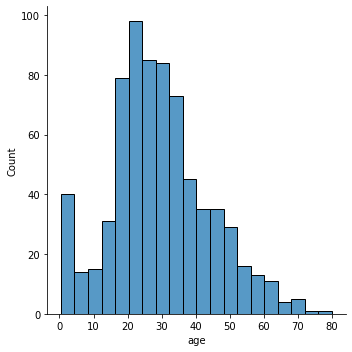

In [130]:
sns.displot(df['age']);
# Distribusi tidak normal --> impute missing value pakai median

In [131]:
# Check the median of 'age' 
X['age'].median()

28.0

In [132]:
# Fill the missing values
X['age'] = X['age'].fillna(X['age'].median())


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
# Recheck missing value
X.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

## **Create a dummy variable**

In [134]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


## **Multicollinearity check**

In [135]:
# Function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes', 'No') 
    return (vif) 
    
calc_vif(X)

,variables,VIF,Acceptable
0,pclass,3.728285,Yes
1,age,4.057797,No
2,fare,1.426615,Yes
3,sex_male,2.901604,Yes


**Interpretasi Multicollinearity**

Hanya fitur age yang memiliki nilai VIF sedikit di atas 4. Dalam kasus ini, nilai tersebut masih dapat ditoleransi dan interpretasi coef nantinya dapat dianggap valid.


## **Logistic Regression modelling using statsmodels**

In [136]:
# model
sm_logit = sm.Logit(y, sm.add_constant(X))

# training 
result = sm_logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.452022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.3212
Time:                        15:12:20   Log-Likelihood:                -402.75
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.282e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6553      0.509      9.153      0.000       3.659       5.652
pclass        -1.1529      0.

## **Interpretasi**

Output yang perlu diperhatikan:
1. LLR p-value
2. P>|z| (p-value tiap variable)
3. coef (Beta atau koefisien regresi tiap variable)

In [137]:
# Interpretasi hanya berlaku/valid pada rentang berikut
df.describe().loc[['min', 'max']][['pclass', 'age', 'fare']]

,pclass,age,fare
min,1.0,0.42,0.0000
max,3.0,80.00,512.3292


**Yang dimodelkan adalah peluang seseorang dapat bertahan hidup dari kecelakaan kapal Titanic**

1. LLR p-value = 3.282e-81 = 0.0000...3282

   - LLR p-value < 0.05, itu berarti kita dapat menolak null hypothesis (H0). Dapat dikatakan minimal ada satu variable independen yang berpengaruh signifikan terhadap tingkat survival seseorang.
<br><br>

2. P>|z| (Wald test)

   - const = 0.000. p-value < 0.05, tolak H0. Artinya, model membutuhkan nilai intercept.
   - pclass = 0.000. p-value < 0.05, tolak H0. Artinya, kelas tiket penumpang berpengaruh signifikan secara negatif terhadap tingkat survival (semakin besar angka kelas (kelas 3), semakin kecil pula peluang bertahan hidupnya).
   - age = 0.000. p-value < 0.05, tolak H0. Artinya, umur penumpang berpengaruh signifikan secara negatif terhadap tingkat survival (semakin tua penumpang, semakin kecil pula peluang bertahan hidupnya).
   - fare = 0.771. p-value > 0.05, gagal menolak H0. Artinya, besaran ongkos yang dibayarkan penumpang tidak berpengaruh signifikan terhadap tingkat survival.
   - sex_male = 0.000. p-value < 0.05, tolak H0. Artinya, jenis kelamin (penumpang pria) berpengaruh signifikan secara negatif terhadap tingkat survival (Penumpang pria cenderung tidak dapat bertahan hidup, karena mungkin lebih mendahulukan untuk menyelamatkan penumpang wanita dan anak-anak).
<br><br>

3. Coef
   - const = 4.655337
   - pclass = -1.152918
   - age = -0.033124
   - fare = 0.000592 (tidak perlu diinterpretasikan karena tidak berpengaruh signifikan terhadap tingkat survival seseorang)
   - sex_male = -2.607296

***Interpretasi coef dengan menggunakan Odd Ratio (OR)***

OR = exp(beta(c-a))

- Jika OR > 1, c > a: tingkat kesuksesan (success rate) meningkat jika Xi meningkat.
- Jika OR < 1, c > a: tingkat kesuksesan (success rate) menurun jika Xi meningkat.

In [138]:
result.params

const       4.655337
pclass     -1.152918
age        -0.033124
fare        0.000592
sex_male   -2.607296
dtype: float64

In [150]:
# Interpretasi pclass

c = 3
a = 1 # pilih c dan a pada rentang 1-3, dengan c > a
Beta = -1.152918

OR_pclass = np.exp(Beta*(c-a))
print('OR_pclass =', OR_pclass)

# OR_pclass_interpretation = 1/OR_pclass
# print('OR_pclass_interpretation =', OR_pclass_interpretation)


OR_pclass = 0.09967543714707312
OR_pclass_interpretation = 10.032561969349377


In [151]:
# Interpretasi pclass

c = 3
a = 1 # pilih c dan a pada rentang 1-3, dengan c > a
Beta = 1.152918

OR_pclass = np.exp(Beta*(c-a))
print('OR_pclass =', OR_pclass)

OR_pclass = 10.032561969349377


### *pclass*

- OR_pclass < 1, tingkat kesuksesan meningkat saat Xi (pclass) menurun (3 ke 1).
- OR_pclass < 1, Ketika pclass naik 2 level (dari 1 ke 3), maka kemungkinan survive turun 10 kali.
- OR_pclass < 1, penumpang kelas 1, kemungkinan dapat bertahan hidupnya 10 kali lebih besar daripada penumpang kelas 3.

In [152]:
# Interpretasi age

c = 50
a = 40 # pilih c dan a pada rentang 0-80, dengan c > a
Beta = -0.033124

OR_age = np.exp(Beta*(c-a))
print('OR_age =', OR_age)

OR_age_interpretation = 1/OR_age
print('OR_age_interpretation =', OR_age_interpretation)

OR_age = 0.7180328204826548
OR_age_interpretation = 1.3926939987615183


In [153]:
# Interpretasi age

c = 50
a = 40 # pilih c dan a pada rentang 0-80, dengan c > a
Beta = 0.033124

OR_age = np.exp(Beta*(c-a))
print('OR_age =', OR_age)

OR_age = 1.3926939987615183


### *age*

- OR_age < 1, tingkat kesuksesan meningkat saat Xi (age) menurun (umur 50 ke 40).
- OR_age < 1, Ketika umur penumpang naik 10 tahun, maka kemungkinan survivenya turun 1.39 kali.
- OR_age < 1. penumpang berumur 40 tahun, kemungkinan bertahan hidupnya 1.39 kali lebih besar dibandingkan penumpang berumur 50 tahun.

In [141]:
# Interpretasi sex_male

c = 1
a = 0
Beta = -2.607296

OR_sex_male = np.exp(Beta*(c-a))
print('OR_sex_male =', OR_sex_male)

OR_sex_male_interpretation = 1/OR_sex_male
print('OR_sex_male_interpretation =', OR_sex_male_interpretation)

OR_sex_male = 0.07373365024003345
OR_sex_male_interpretation = 13.56232868906649


In [154]:
# Interpretasi sex_male

c = 1
a = 0
Beta = 2.607296

OR_sex_male = np.exp(Beta*(c-a))
print('OR_sex_male =', OR_sex_male)

OR_sex_male = 13.56232868906649


### *sex_male*

- OR_sex_male < 1, tingkat kesuksesan meningkat saat Xi (sex) adalah wanita.
- OR_sex_male < 1, Ketika penumpangnya berjenis kelamin Laki-laki, maka kemungkinan survivenya lebih kecil 13.5 kali lipat dari pada perempuan.
- OR_sex_male < 1, penumpang perempuan, kemungkinan bertahan hidupnya 13.5 kali lebih besar dibandingkan penumpang laki-laki.

## **Accuracy**

In [156]:
df[['pclass','sex','age','survived']]

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


In [157]:
# result adalah model yang sudah difitting
# sekarang, result diminta untuk memprediksi X

result.predict(sm.add_constant(X))

0      0.105726
1      0.907703
2      0.584201
3      0.914863
4      0.071405
         ...   
886    0.241503
887    0.947391
888    0.570278
889    0.512911
890    0.078269
Length: 891, dtype: float64

In [147]:
# Hasil prediksi dalam bentuk probability dan dalam betuk class (1 atau 0)
y_predict_proba = result.predict(sm.add_constant(X))
y_predict_class = np.where(y_predict_proba > 0.5, 1, 0)

# Masukkan hasil prediksi ke dalam dataframe
df['survive_proba'] = y_predict_proba
df['survive_pred'] = y_predict_class

In [148]:
# hasil
df[['pclass', 'age', 'fare','survived', 'survive_proba', 'survive_pred']]

,pclass,age,fare,survived,survive_proba,survive_pred
0,3,22.0,7.2500,0,0.105726,0
1,1,38.0,71.2833,1,0.907703,1
2,3,26.0,7.9250,1,0.584201,1
3,1,35.0,53.1000,1,0.914863,1
4,3,35.0,8.0500,0,0.071405,0
...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0.241503,0
887,1,19.0,30.0000,1,0.947391,1
888,3,NaN,23.4500,0,0.570278,1
889,1,26.0,30.0000,1,0.512911,1


In [144]:
# y_predict_proba

In [145]:
# y_predict_class

In [159]:
accuracy_score(df['survived'], df['survive_pred'])

0.8002244668911336

In [158]:
accuracy_score(y, y_predict_class)

0.8002244668911336

In [146]:
from sklearn.metrics import accuracy_score

print('Model accuracy score in the test set:', accuracy_score(y, y_predict_class))

Model accuracy score in the test set: 0.8002244668911336


**Interpretasi hasil metrics**

Accuracy=80%. Katakanlah ada 100 penumpang yang diprediksi oleh model, maka 80 penumpang akan terprediksi (survived or not survived) dengan benar.